In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch as th
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from dc_regression_gpu import dc_regression

In [2]:
# Data
n = 50
dim = 2

pi = 3.14159265
X = th.rand(n, dim)
y = th.sin(3*pi*X[:,0]) + th.cos(3*pi*X[:,1]) + 3*th.log(th.abs(3*pi*X[:,0]+3*pi*X[:,1])+1)

if th.cuda.is_available():
    device = th.device("cuda")          # a CUDA device object
else:
    device = th.device("cpu")
X = X.to(device)
y = y.to(device)   

In [3]:
# Fitting
model = dc_regression()    
model.fit(X,y)
y_hat = model.predict(X)

100%|██████████| 9/9 [00:05<00:00,  1.66it/s]


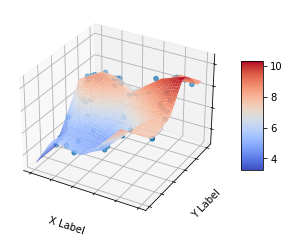

In [4]:
# Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')

d_mesh = 0.01
X_mesh = th.arange(th.min(X[:,0]), th.max(X[:,0]), d_mesh, device=device)
Y_mesh = th.arange(th.min(X[:,1]), th.max(X[:,1]), d_mesh, device=device)
X_mesh, Y_mesh = th.meshgrid(X_mesh, Y_mesh)

X_mesh_all = th.cat((X_mesh.reshape(-1,1), Y_mesh.reshape(-1,1)), dim=1)
X_mesh_all = th.cat((X_mesh_all,  th.zeros(X_mesh_all.shape[0],dim-2, device=device)), dim=1)

f_hat_mesh = model.predict(X_mesh_all).reshape(X_mesh.shape)


# Plot the surface.
surf = ax.plot_surface(X_mesh.cpu().numpy(), Y_mesh.cpu().numpy(), f_hat_mesh.cpu().numpy(), cmap = cm.coolwarm)
ax.scatter(X.cpu().numpy()[:,0],X.cpu().numpy()[:,1],y.cpu().numpy())

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

plt.show()